# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context**
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [165]:
!pip install scikit-learn-extra

In [103]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
bank_data = pd.read_excel("/content/drive/MyDrive/Classes/MIT/ADSP/Coursework/9 - Elective Project/Data Analysis and Visualization/Bank/Credit+Card+Customer+Data.xlsx")

### **Data Overview**

- Observations
- Sanity checks




In [168]:
bank_data.shape

(660, 7)

In [169]:
n = 660

In [170]:
bank_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [171]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [172]:
bank_data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [173]:
bank_data_copy = bank_data.copy()

In [174]:
bank_data.drop(['Sl_No', 'Customer Key'], axis =1, inplace=True) #dropping irrelevant data

In [175]:
bank_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

In [176]:
bank_data.isnull().sum() #checking this shows that there are no missing values

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#### **Check the summary Statistics**

In [177]:
bank_data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


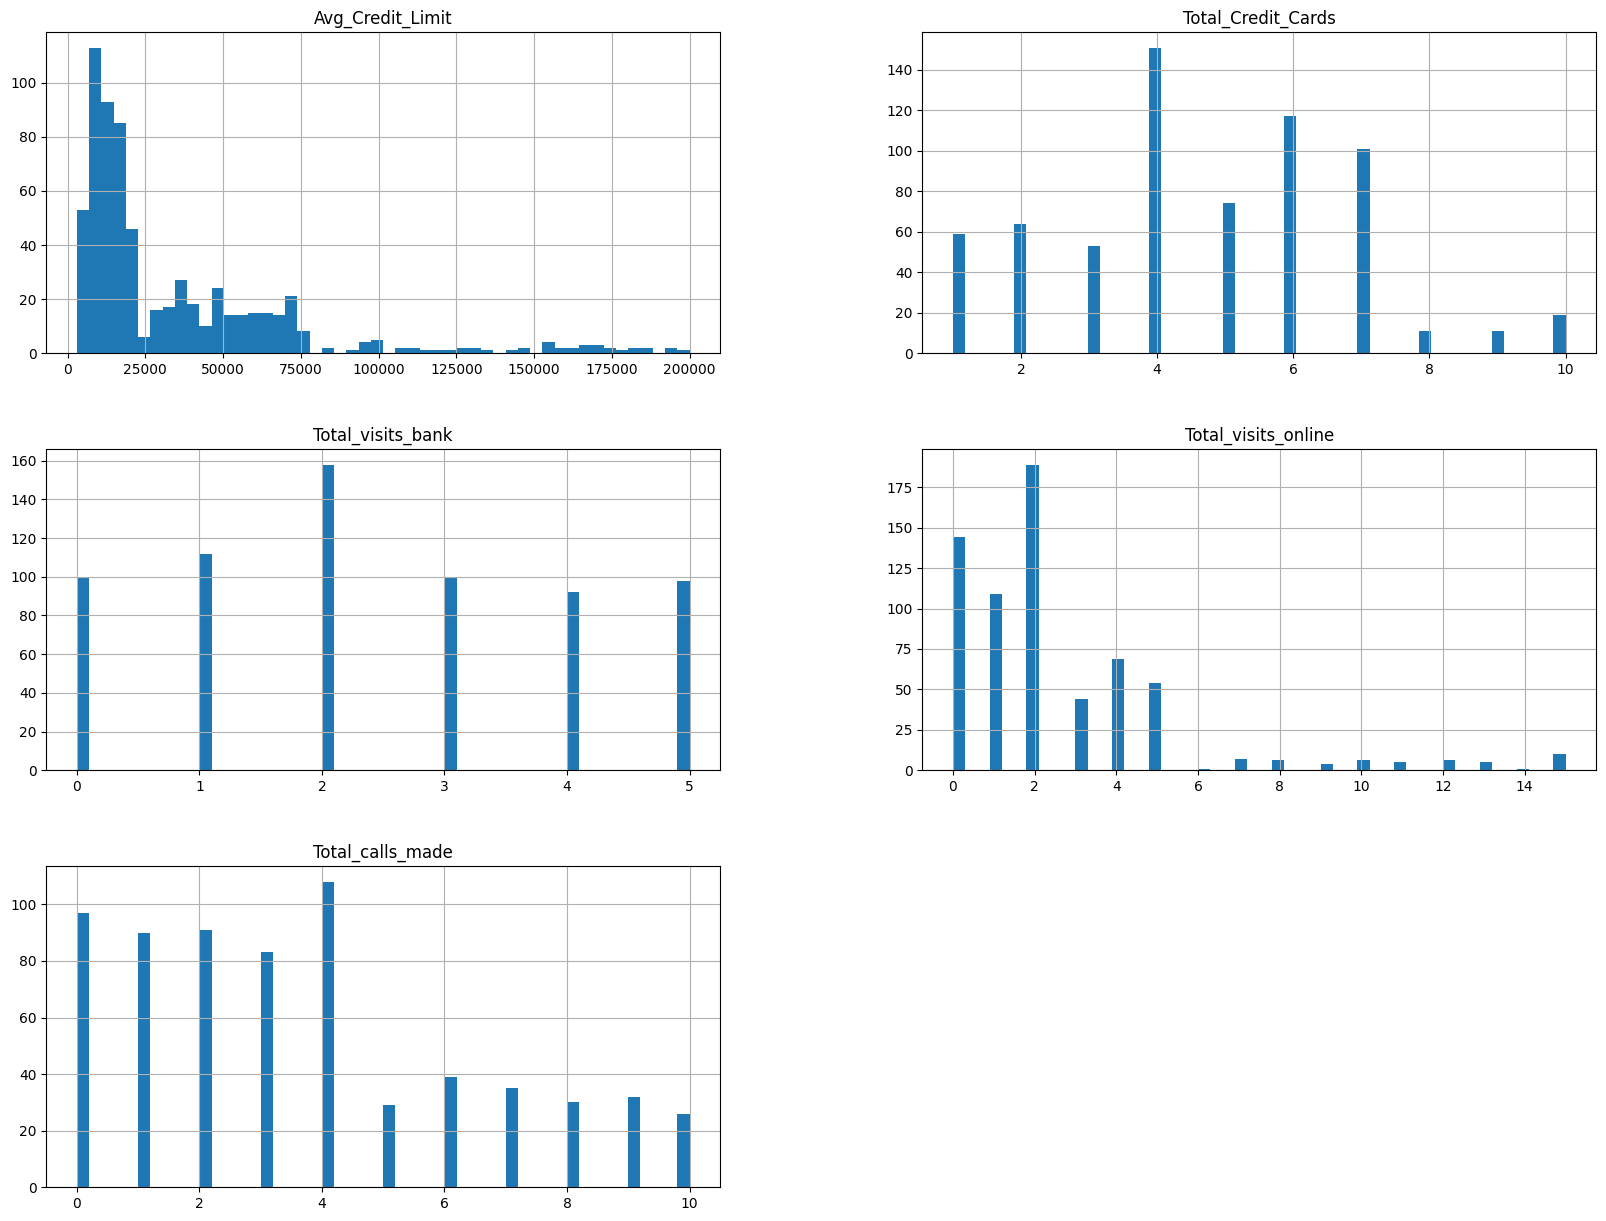

In [221]:
bank_data.hist(bins=50, figsize=(20,15))
plt.show()

In [179]:
skewness = bank_data.skew()
print(skewness)

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64


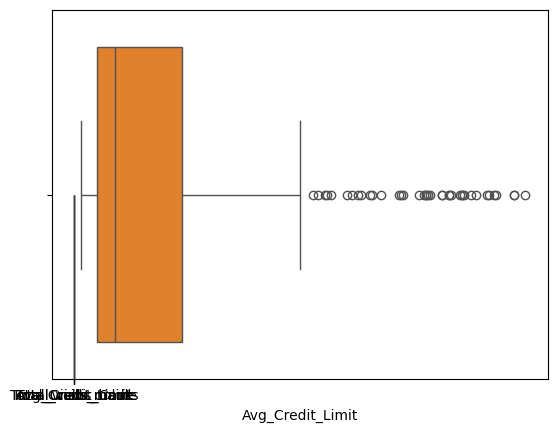

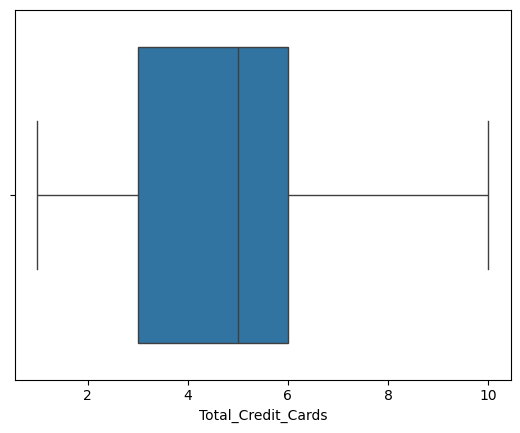

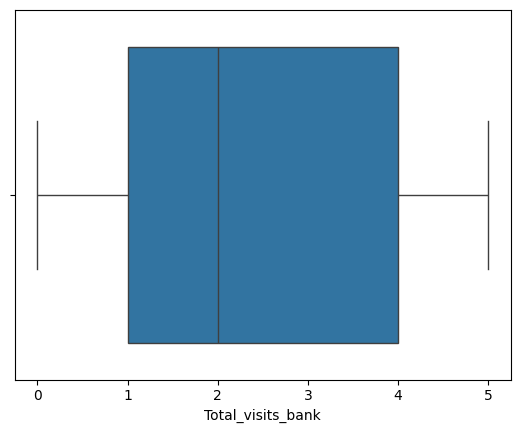

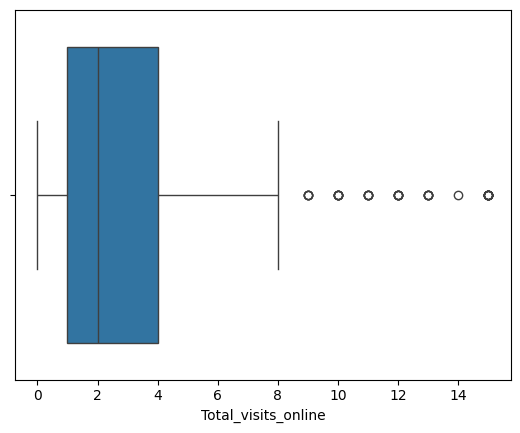

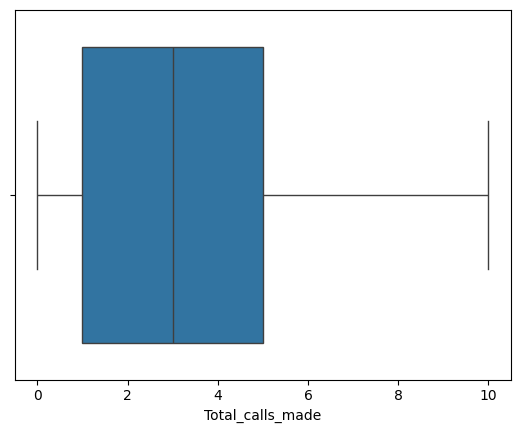

In [222]:
sns.boxplot(data=bank_data)
for x in bank_data.columns:
  sns.boxplot(x=bank_data[x])
  plt.show()

<Axes: >

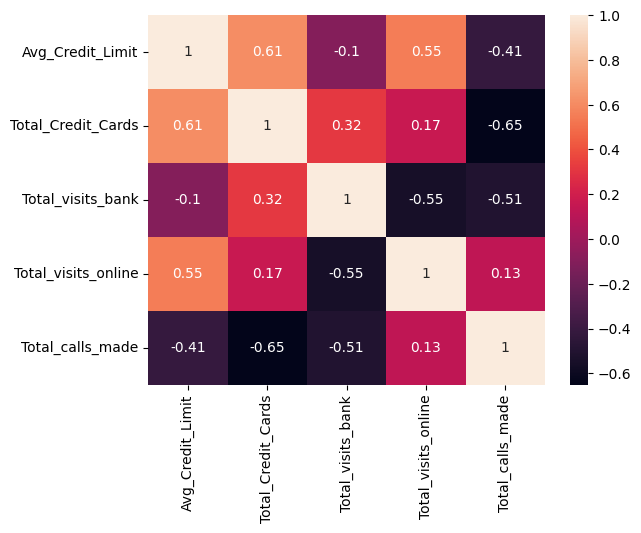

In [223]:
sns.heatmap(bank_data.corr(), annot=True)

**Observations:**

*   Both Average Credit Limit and Total Visits Online are highly skewed (+2.2). They also both have many outliers to the right.  So while most credit limits and total visits are on the lower end, there are notable exceptions with high credit limits and high total visits.
*   While not to the extent of Average Credit Limit and Total Visits Online, another positively skewed variable is total calls made (.7 rounded) with the majority of users making between 0 to 4 calls.
*   As for correlation of variables, Average Credit Limit is positively associated with Total Credit Cards (+0.61).  Total Visits Online is also positively associated iwth Average Credit Limit (0.55), though to a lesser extent.  Both correlations may be due to the fact that having more credit cards results in higher total credit limits and additional online activities with each indivdiual card.
*   In terms of negative correlation, Total Calls Made is negatively associated with Total Credit Cards (-0.65).  This is interesting because typically more credit cards would indiciate more activity and thus phone calls.  However, this negative correlation may suggest that they are conducting more activity online as a preference.
*   Total Visits Online is negative associated with Total Visits to the Bank (-0.55).  Again, this may due to the fact that making in person visits decreases as more customers visit the bank online.

#### **Scaling the data**

In [182]:
scaler = StandardScaler()

In [183]:
bank_data_scaled = scaler.fit_transform(bank_data)
bank_data_scaled= pd.DataFrame(bank_data_scaled, columns=bank_data.columns)

In [184]:
bank_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


#### **Applying PCA on scaled data**

In [188]:
n=bank_data_scaled.shape[1]
print(n)

5


In [189]:
pca = PCA(n_components = n, random_state=1)
pca_result = pca.fit_transform(bank_data_scaled)
pca_bank_data = pd.DataFrame(pca_result)
exp_var = pca.explained_variance_ratio_
print(exp_var)

[0.45736578 0.37426483 0.06401348 0.0555688  0.04878711]


Text(0, 0.5, 'Cumulative Explained Variance')

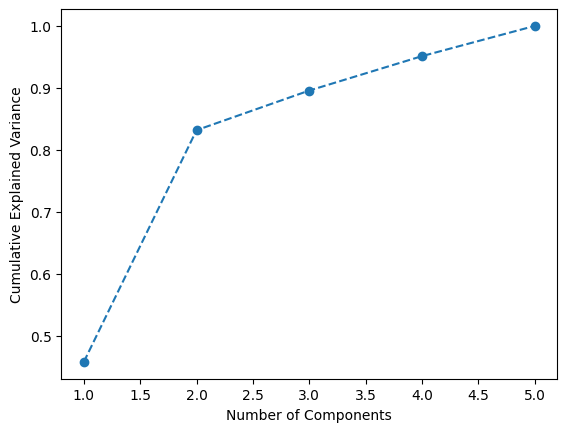

In [224]:
plt.plot(range(1, 6), exp_var.cumsum(), marker = 'o', linestyle = '--') #shows range of 1 to 5 columns
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [191]:
bank_data_scaled_copy =  bank_data_scaled.copy(deep=True)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

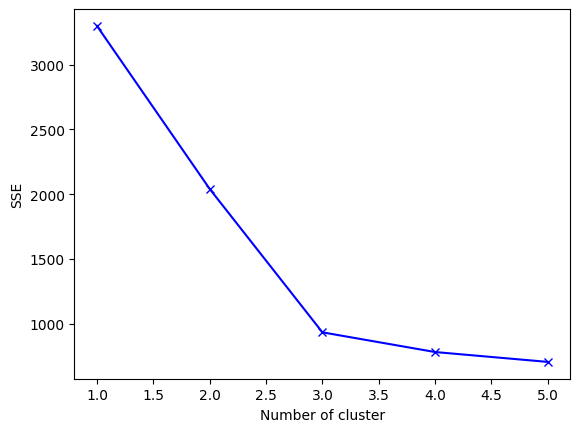

In [225]:
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 6):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(bank_data_scaled)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

In [193]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans_bank_data_scaled = bank_data_scaled.copy()

kmeans.fit(kmeans_bank_data_scaled)

kmeans_bank_data_scaled['KMeans_Labels'] = kmeans.predict(kmeans_bank_data_scaled)

In [195]:
print(kmeans_bank_data_scaled)

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            1.740187           -1.249225          -0.860451   
1            0.410293           -0.787585          -1.473731   
2            0.410293            1.058973          -0.860451   
3           -0.121665            0.135694          -0.860451   
4            1.740187            0.597334          -1.473731   
..                ...                 ...                ...   
655          1.713589            2.443892          -0.860451   
656          1.314621            2.443892          -0.860451   
657          2.937092            1.520613          -0.860451   
658          3.655235            2.443892          -0.860451   
659          3.522245            1.982253          -1.473731   

     Total_visits_online  Total_calls_made  KMeans_Labels  
0              -0.547490         -1.251537              0  
1               2.520519          1.891859              1  
2               0.134290          0.145528         

In [197]:
kmeans_bank_data['KMeans_Labels'].value_counts()

KMeans_Labels
0    386
1    224
2     50
Name: count, dtype: int64

In [198]:
print(kmeans_bank_data['KMeans_Labels'])

0      0
1      1
2      0
3      0
4      2
      ..
655    2
656    2
657    2
658    2
659    2
Name: KMeans_Labels, Length: 660, dtype: int32


#### **Create the cluster profiles using the summary statistics and box plots for each label**

In [199]:
k_mean = kmeans_bank_data.groupby('KMeans_Labels').mean()

k_median = kmeans_bank_data.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([k_mean, k_median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,33782.383420,12174.107143,141040.00,31000.0,12000.0,145500.0
Total_Credit_Cards,5.515544,2.410714,8.74,6.0,2.0,9.0
Total_visits_bank,3.489637,0.933036,0.60,3.0,1.0,1.0
Total_visits_online,0.981865,3.553571,10.90,1.0,4.0,11.0
Total_calls_made,2.000000,6.870536,1.08,2.0,7.0,1.0


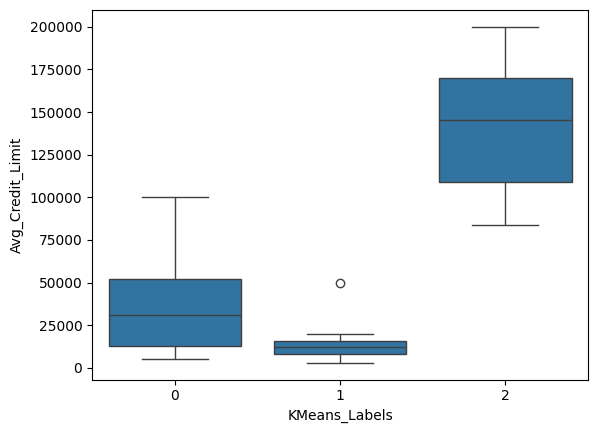

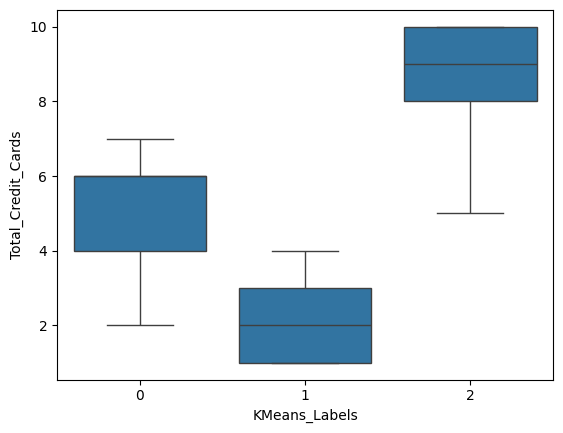

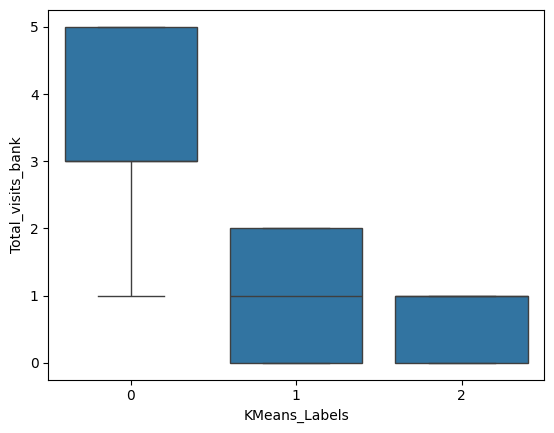

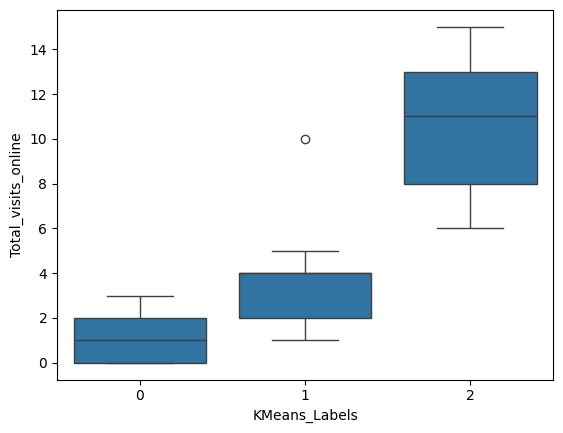

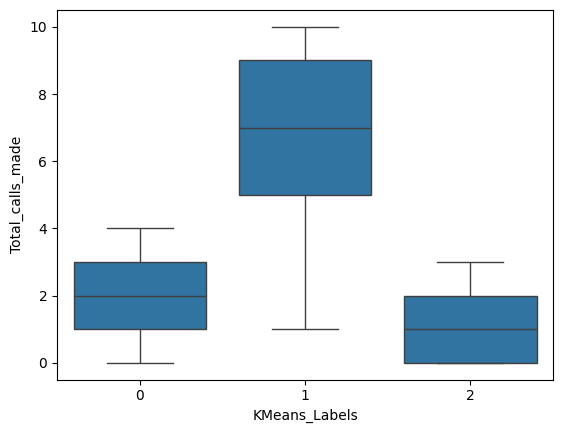

In [226]:
kmean_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in kmean_columns:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = kmeans_bank_data)
    plt.show()

**Cluster Profiles:**

*   Group 0 can be characterized by having the most Total Visits to the Bank and the least Total Visits Online (which was found to be negatively correlated in the earlier heatmap analysis).
*   Group 1 has the highest number of Total Calls Made.  This group's Average Credit Limit and Total Credit Cards is also the lowest.  (Again, Average Credit Limit and Total Credit Cards are positively correlated).
*   Group 2 has the highest Average Credit Limit, the most Total Credit Cards, and highest number of Total Visits Online.  They also have the least Total Calls Made.  (These were also correlations found in the heatmap analysis).

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [218]:
gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm_bank_data = bank_data.copy()

gmm_bank_data_scaled = bank_data_scaled.copy()

gmm.fit(gmm_bank_data_scaled)

gmm_bank_data['GmmLabels'] = gmm.predict(gmm_bank_data_scaled)

gmm_bank_data.GmmLabels.value_counts()

GmmLabels
0    386
1    224
2     50
Name: count, dtype: int64

#### **Create the cluster profiles using the summary statistics and box plots for each label**


In [202]:
gmm_features_list = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

gmm_features_list.append('GmmLabels')

gmm_mean = gmm_bank_data.groupby('GmmLabels').mean()

gmm_median = gmm_bank_data.groupby('GmmLabels').median()

df_gmm = pd.concat([gmm_mean, gmm_median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,33782.383420,12174.107143,141040.00,31000.0,12000.0,145500.0
Total_Credit_Cards,5.515544,2.410714,8.74,6.0,2.0,9.0
Total_visits_bank,3.489637,0.933036,0.60,3.0,1.0,1.0
Total_visits_online,0.981865,3.553571,10.90,1.0,4.0,11.0
Total_calls_made,2.000000,6.870536,1.08,2.0,7.0,1.0


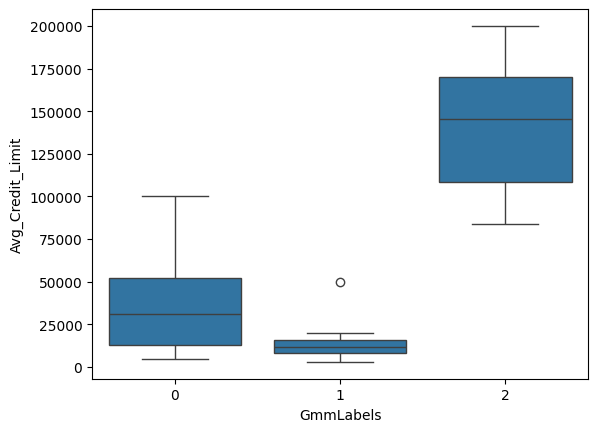

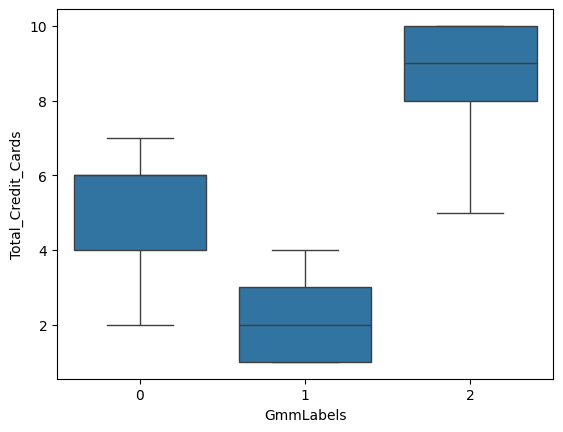

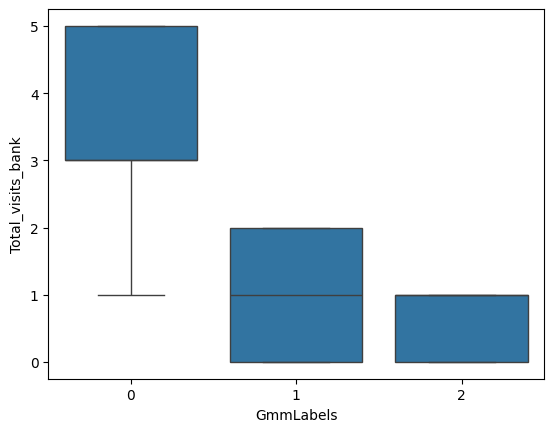

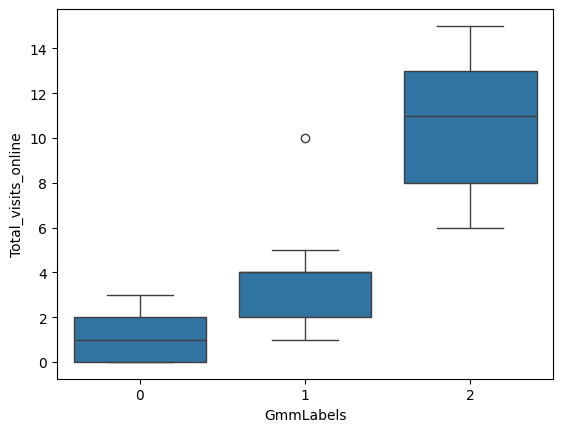

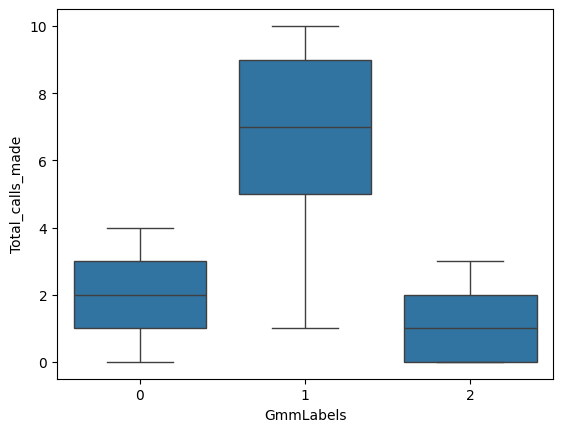

In [227]:
gmm_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in gmm_columns:
    sns.boxplot(x = 'GmmLabels', y = col, data = gmm_bank_data)
    plt.show()

#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

**Comparing Clusters:**

*   In comparison to the clusters from K-means, there are no observable differences from the clusters I found using Gaussian Mixture Model.
*   Same as the K-means clustering: Group 0 has the highest Total Visits to the Bank and least Total Visits Online.  Group 1 has the most Total Calls Made and lowest Average Credit Limit and Total Credit Card.  Group 2 has the highest Average Credit limit, Total Credit Cards and Total Visits Online while also having the lowest Calls Made.

## **K-Medoids**

- Apply the K-Medoids clustering algorithm on the pca components

In [213]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo_bank_data = bank_data.copy()

kmedo_bank_data_scaled = bank_data_scaled.copy()

kmedo.fit(kmedo_bank_data_scaled)

kmedo_bank_data_scaled['kmedoLabels'] = kmedo.predict(kmedo_bank_data_scaled)

In [210]:
kmedo_bank_data_scaled.kmedoLabels.value_counts()

kmedoLabels
2    280
0    224
1    156
Name: count, dtype: int64

In [214]:
print(kmedo_bank_data_scaled)

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            1.740187           -1.249225          -0.860451   
1            0.410293           -0.787585          -1.473731   
2            0.410293            1.058973          -0.860451   
3           -0.121665            0.135694          -0.860451   
4            1.740187            0.597334          -1.473731   
..                ...                 ...                ...   
655          1.713589            2.443892          -0.860451   
656          1.314621            2.443892          -0.860451   
657          2.937092            1.520613          -0.860451   
658          3.655235            2.443892          -0.860451   
659          3.522245            1.982253          -1.473731   

     Total_visits_online  Total_calls_made  kmedoLabels  
0              -0.547490         -1.251537            1  
1               2.520519          1.891859            0  
2               0.134290          0.145528            1  

In [215]:
kmedo_mean = kmedo_bank_data_scaled.groupby('kmedoLabels').mean()

kmedo_median = kmedo_bank_data_scaled.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([kmedo_mean, kmedo_median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,-0.596746,1.224768,-0.204974,-0.613726,0.835859,-0.414242
Total_Credit_Cards,-1.055501,0.934686,0.323647,-1.249225,1.058973,0.597334
Total_visits_bank,-0.896043,-0.369040,0.922442,-0.860451,-0.247170,0.979390
Total_visits_online,0.324519,0.531995,-0.556012,0.475180,-0.206600,-0.547490
Total_calls_made,1.152786,-0.550766,-0.615374,1.193326,-0.553005,-0.553005


#### **Create cluster profiles using the summary statistics and box plots for each label**

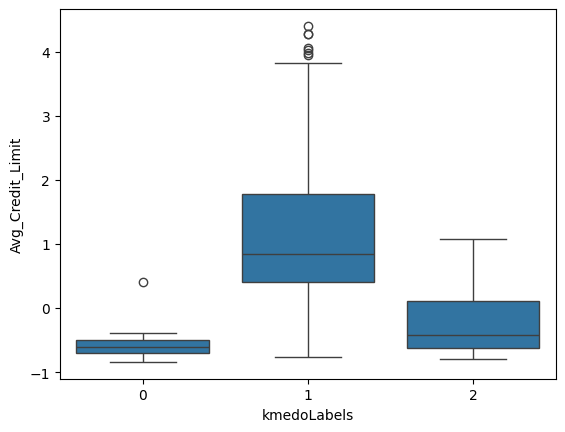

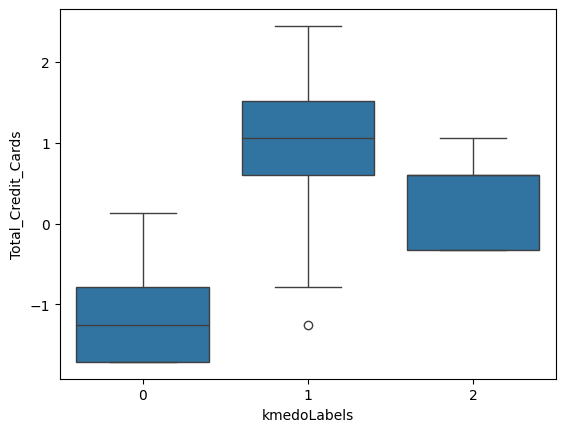

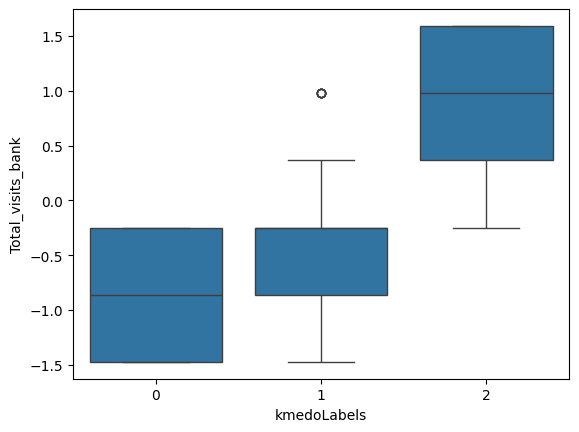

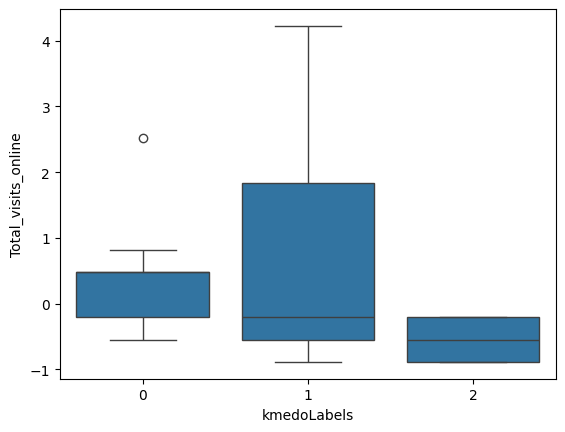

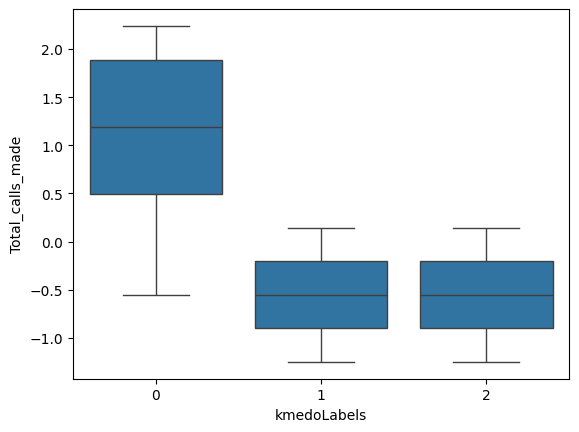

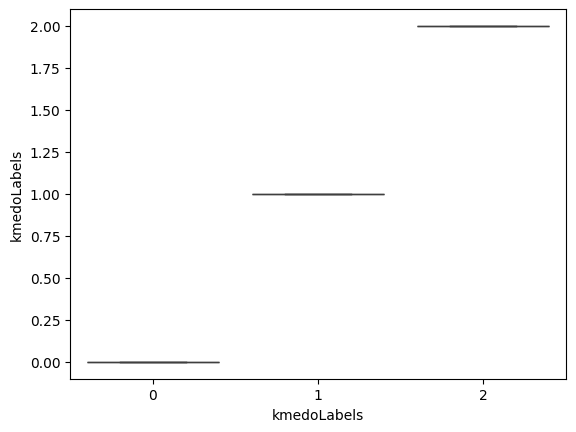

In [228]:
kmedo_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'kmedoLabels']

for col in kmedo_columns:
    sns.boxplot(x = 'kmedoLabels', y = col, data = kmedo_bank_data_scaled)
    plt.show()

**Cluster Profiles:**

*   Group 0 typically has much lower Average Credit limits and Total Credit Cards.  It also shares in having less Total Visits to the Bank.  Their notable characteristic is that they have the most Total Calls Made.
*   Group 1 has the highest Average Credit Limits and Total Credit Cards.  They have the max and biggest range for Total Visits Online.
*   Group 2 has the largest Total Visits to the Bank and lowest Total Visits Online as well as Total Calls Made.

#### **Compare the clusters from K-Means and K-Medoids**

**Comparing Clusters:**

*   Group 0 in K-Medoids (most total calls made; lowest Average Credit Limits, Total Credit Cards, lowest Total Visits) is most similar to K-mean's Group 1.
*   Group 1 in K-Medoids (highest Average Credit and Total Credit Cards) is most similar to K-Mean's Group 2.
*   Group 2 in K-Medoids (highest Total Visits to Bank and lowest Total Visits Online) is most similar to K-Mean's Group 0.
*   Essentially, both K-Means and K-Medoids algorithms led to the same clustering / groupings.

## **Conclusions and Business Recommendations**



*   When grouping via different algorithms, there appears to be 3 major types of customers. These groups were consistently characterized by highly correlated factors.
*   As described previously, the first group can be described as those who have made many phone calls. They do not visit the store and seem to prefer phone calls. They do not own many credit cards or a high credit limit.  In terms of customer value, there is an opportunity market to this group by improving their phone call experiences and offering additional credit cards to open.  There is room for research to study what types of credit cards they would likely prefer opening.  There is also room to help onboard these customers to the bank's online platform or improve bank visit accessibility.
*   The second group is characterized as having both high average credit limits and many credit cards.  They are bank customers that have several card products opened.  Due to their value as customers, it is worth noting that this group has the most total visits online.  Whether this caused them to open more cards is not determinable, but it is apparent that to ensure customer satisfaction in this group, the online bank's user experience needs to be prioritized.
*   Lastly, the third group is characterized by having the most visits to the bank and least phone calls.  They have more cards opened than the first group, which may suggest that customers who visit the bank are still more engaged and likely to open an account than those who are solely engaged by phone.
*   Since both the second and third groups have more cards opened than the first group, there are some correlations that could help future business strategies.  Namely, a focus on primarily online bank visits (strenghtening online platform) may improve product engagement. (Loosely defining product engagement by number of products utilized with the bank).
*   Next steps may involve determining demographics of these groups, as it may lead to more insights on customer needs and behaviors.